In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
user = pd.read_csv('user_table.csv', parse_dates=['date'])

In [145]:
home = pd.read_csv('home_page_table.csv')

In [146]:
search = pd.read_csv('search_page_table.csv')

In [147]:
payment = pd.read_csv('payment_page_table.csv')

In [148]:
pay_confirm = pd.read_csv('payment_confirmation_table.csv')

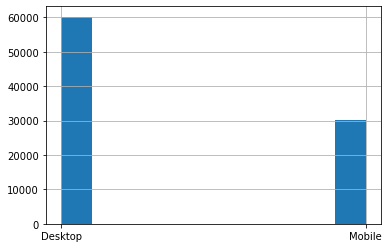

In [105]:
user['device'].hist()

In [149]:
user_home = user.merge(home, how = 'left', on= 'user_id')
user_home

,user_id,date,device,sex,page
0,450007,2015-02-28,Desktop,Female,home_page
1,756838,2015-01-13,Desktop,Male,home_page
2,568983,2015-04-09,Desktop,Male,home_page
3,190794,2015-02-18,Desktop,Female,home_page
4,537909,2015-01-15,Desktop,Male,home_page
...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,home_page
90396,642989,2015-02-08,Desktop,Female,home_page
90397,659645,2015-04-13,Desktop,Male,home_page
90398,359779,2015-03-23,Desktop,Male,home_page


In [197]:
def conversion_rate(df, s):
    mask = df[df['device']== 'Desktop']
    cv_rate_desk = (mask.shape[0] - mask['page_'+ s].isnull().sum())/mask.shape[0] * 100
    mask = df[df['device']== 'Mobile']
    cv_rate_mob = (mask.shape[0] - mask['page_' + s].isnull().sum())/mask.shape[0] * 100
    print('Desktop Conversion Rate', cv_rate_desk)
    print('Mobile Conversion Rate', cv_rate_mob)

# Visiting probability for each stage overall

In [198]:
data = user_home.merge(search,how = 'left', on= 'user_id', suffixes=('_home', '_search'))
data = data.merge(search, how='left', on='user_id', suffixes=('_home', '_search'))
data = data.merge(payment, how='left', on='user_id', suffixes=('_search1', '_payment'))
data = data.merge(pay_confirm, how='left', on='user_id', suffixes=('_payment', '_confirmation'))
data = data.rename(columns={"page": "page_confirmation"})
data = data.drop(columns=['page_search1'])
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [199]:
convertion_prob = 1 - pd.DataFrame(data[['page_home','page_search','page_payment','page_confirmation']].isnull().sum())/len(data)
convertion_prob = convertion_prob.rename(columns={0: 'conversion'})
convertion_prob = convertion_prob.reset_index()
convertion_prob

,index,conversion
0,page_home,1.000000
1,page_search,0.500000
2,page_payment,0.066704
3,page_confirmation,0.005000


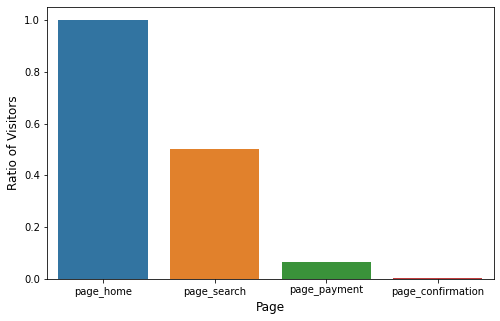

In [200]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='index', y='conversion', data=convertion_prob, ax=ax)
ax.set_xlabel('Page', fontsize=12)
ax.set_ylabel('Ratio of Visitors', fontsize=12)
plt.show()

# Conversion Rate across platform

In [201]:
def conversion_rate_1(df):
    """ function to calculate conversion rates for home, search and payment page"""
    rates = []
    tmp = df[~df['page_home'].isnull()]
    rates.append(1 - tmp['page_search'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_search'].isnull()]
    rates.append(1 - tmp['page_payment'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_payment'].isnull()]
    rates.append(1 - tmp['page_confirmation'].isnull().sum() / len(tmp))
    
    return rates

In [202]:
rates = conversion_rate_1(data)
names = ['home', 'search', 'payment']
maps = {'Page': ['home', 'search', 'payment'], 'Conversion Rate': rates}
overall_conv = pd.DataFrame(maps, columns=['Page', 'Conversion Rate'])

overall_conv

,Page,Conversion Rate
0,home,0.500000
1,search,0.133407
2,payment,0.074959


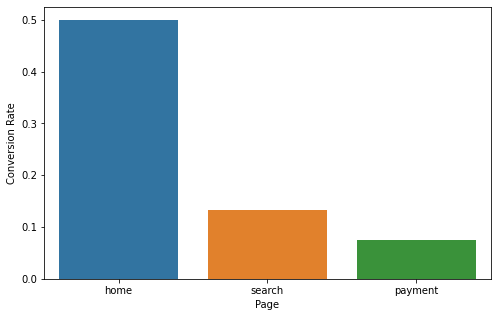

In [203]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=overall_conv, ax=ax)
plt.show()

# Conversion rate from home page to search page

In [108]:
home_search = user_home.merge(search,how = 'left', on= 'user_id', suffixes=('_home', '_search'))
home_search

,user_id,date,device,sex,page_home,page_search
0,450007,2015-02-28,Desktop,Female,home_page,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page
3,190794,2015-02-18,Desktop,Female,home_page,search_page
4,537909,2015-01-15,Desktop,Male,home_page,NaN
...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,home_page,NaN
90396,642989,2015-02-08,Desktop,Female,home_page,search_page
90397,659645,2015-04-13,Desktop,Male,home_page,search_page
90398,359779,2015-03-23,Desktop,Male,home_page,NaN


In [109]:
conversion_rate(home_search, 'search')

Desktop Conversion Rate 50.0
Mobile Conversion Rate 50.0


# Conversion rate from search page to payment page

In [110]:
home_search = home_search.dropna()

In [111]:
search_pay = home_search.merge(payment,how = 'left', on= 'user_id', suffixes=('_search', '_payment'))
search_pay = search_pay.rename(columns={"page": "page_payment"})
search_pay

,user_id,date,device,sex,page_home,page_search,page_payment
0,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN
1,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN
2,377150,2015-04-15,Desktop,Female,home_page,search_page,NaN
3,615615,2015-02-24,Mobile,Female,home_page,search_page,NaN
4,236201,2015-03-14,Desktop,Male,home_page,search_page,NaN
...,...,...,...,...,...,...,...
45195,545678,2015-03-03,Desktop,Female,home_page,search_page,NaN
45196,492404,2015-02-27,Desktop,Male,home_page,search_page,payment_page
45197,163518,2015-02-26,Mobile,Female,home_page,search_page,payment_page
45198,642989,2015-02-08,Desktop,Female,home_page,search_page,NaN


In [112]:
conversion_rate(search_pay, 'payment')

Desktop Conversion Rate 10.0
Mobile Conversion Rate 20.0


# Conversion rate from Payment page to Payment confirmation page

In [113]:
search_pay = search_pay.dropna()
search_pay

,user_id,date,device,sex,page_home,page_search,page_payment
13,838832,2015-03-08,Desktop,Female,home_page,search_page,payment_page
25,231324,2015-02-22,Desktop,Female,home_page,search_page,payment_page
30,13830,2015-02-05,Desktop,Male,home_page,search_page,payment_page
31,838723,2015-02-19,Desktop,Male,home_page,search_page,payment_page
37,205344,2015-01-27,Desktop,Female,home_page,search_page,payment_page
...,...,...,...,...,...,...,...
45159,908777,2015-04-02,Mobile,Female,home_page,search_page,payment_page
45174,377893,2015-02-09,Desktop,Male,home_page,search_page,payment_page
45193,182714,2015-01-13,Desktop,Female,home_page,search_page,payment_page
45196,492404,2015-02-27,Desktop,Male,home_page,search_page,payment_page


In [114]:
pay_confirm = search_pay.merge(pay_confirm,how = 'left', on= 'user_id', suffixes=('_payment', '_confirm'))
pay_confirm = pay_confirm.rename(columns={"page": "page_confirm"})
pay_confirm

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirm
0,838832,2015-03-08,Desktop,Female,home_page,search_page,payment_page,NaN
1,231324,2015-02-22,Desktop,Female,home_page,search_page,payment_page,NaN
2,13830,2015-02-05,Desktop,Male,home_page,search_page,payment_page,payment_confirmation_page
3,838723,2015-02-19,Desktop,Male,home_page,search_page,payment_page,NaN
4,205344,2015-01-27,Desktop,Female,home_page,search_page,payment_page,NaN
...,...,...,...,...,...,...,...,...
6025,908777,2015-04-02,Mobile,Female,home_page,search_page,payment_page,NaN
6026,377893,2015-02-09,Desktop,Male,home_page,search_page,payment_page,payment_confirmation_page
6027,182714,2015-01-13,Desktop,Female,home_page,search_page,payment_page,NaN
6028,492404,2015-02-27,Desktop,Male,home_page,search_page,payment_page,NaN


In [115]:
conversion_rate(pay_confirm, 'confirm')

Desktop Conversion Rate 4.983388704318937
Mobile Conversion Rate 10.0


# Conversion between sex

In [215]:
male_rates = conversion_rate_1(data[data['sex'] == 'Male'])
female_rates = conversion_rate_1(data[data['sex'] == 'Female'])

In [216]:
male_rates

[0.4969442912300055, 0.13008346652459601, 0.07201365187713316]

In [217]:
female_rates

[0.5030726566833056, 0.13670841418239543, 0.07774193548387098]

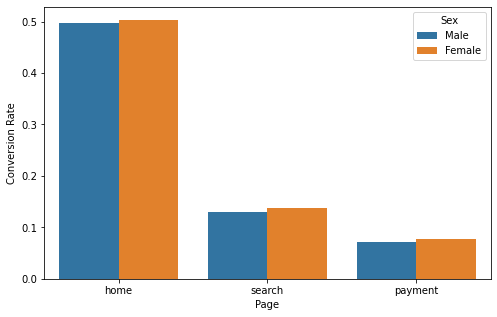

In [218]:
maps = {'Page': ['home', 'search', 'payment', 'home', 'search', 'payment'], 
        'Sex': ['Male', 'Male', 'Male', 'Female', 'Female', 'Female'], 
        'Conversion Rate': male_rates + female_rates}
sex_conv = pd.DataFrame(maps, columns=['Page', 'Sex', 'Conversion Rate'])

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Page', y='Conversion Rate', data=sex_conv, ax=ax, hue='Sex')
plt.show()

# Overall Conversion from home to payment connfirmation

In [204]:
user_home = user.merge(home, how = 'left', on= 'user_id')

In [205]:
home_confirm = user_home.merge(pay_confirm,how = 'left', on= 'user_id', suffixes=('_home', '_confirm'))
home_confirm

,user_id,date,device,sex,page_home,page_confirm
0,450007,2015-02-28,Desktop,Female,home_page,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN
2,568983,2015-04-09,Desktop,Male,home_page,NaN
3,190794,2015-02-18,Desktop,Female,home_page,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN
...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,home_page,NaN
90396,642989,2015-02-08,Desktop,Female,home_page,NaN
90397,659645,2015-04-13,Desktop,Male,home_page,NaN
90398,359779,2015-03-23,Desktop,Male,home_page,NaN


In [206]:
conversion_rate(home_confirm, 'confirm')

Desktop Conversion Rate 0.24916943521594684
Mobile Conversion Rate 1.0


Conclusion: 
There are four main stages of conversion, home -> search -> payment -> confirm_payment

Overall, the churn from one to another fall dramatically from search to payment. Maybe it is because of the search result is ineffective; however, one thing to notice here across platform, the sex conversion rate is not that different. The product did a good job at implementing scenario when it comes to sex.

Most importantly, one thing to notice here is that when it comes to different two platform, between desktop and mobile, overall conversion rate from home page to confirm payment has a huge difference. If we take a look at stage by stage, as we can see from the search to payment stage, the desktop conversion rate is substantially lower than the mobile version. 
Thus, I suggest product team to investigate on the desktop version of the website to further investigate what is preventing user to checkout on the deskotp version of the site.